# Build a simple trading strategy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### add two columns (MA10, MA50)

In [2]:
fb = pd.DataFrame.from_csv('../data/facebook.csv')
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [3]:
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


### Add "Shares" column to make decisions base on the strategy

In [4]:
fb.shape

(731, 8)

In [5]:
fb['Share'] = [1 if fb.iloc[num,6] > fb.iloc[num,7] else 0 for num in range(len(fb))]

In [6]:
fb.head(20)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Share
Date,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648000,21.0174,1
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685000,21.0758,1
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792000,21.1382,1
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836000,21.1998,1
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872000,21.2804,1
2015-03-20,23.410000,23.610001,23.190001,23.469999,22.866215,11552100,22.964000,21.3670,1
2015-03-23,22.770000,23.070000,22.700001,22.709999,22.125767,10595700,22.974000,21.4240,1
2015-03-24,22.639999,22.799999,22.299999,22.400000,21.823744,8262000,22.914000,21.4732,1
2015-03-25,22.389999,22.389999,20.969999,21.040001,20.498730,13563800,22.730000,21.5002,1


### Add "Profit" column to calculate the profit

In [7]:
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ind,'Close1'] - fb.loc[ind, 'Close'] if fb.loc[ind, 'Share'] == 1 else 0 for ind in fb.index]
fb.head(20)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Share,Close1,Profit
Date,,,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648000,21.0174,1,22.969999,0.269998
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685000,21.0758,1,23.250000,0.280001
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792000,21.1382,1,22.870001,-0.379999
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836000,21.1998,1,23.219999,0.349998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872000,21.2804,1,23.469999,0.250000
2015-03-20,23.410000,23.610001,23.190001,23.469999,22.866215,11552100,22.964000,21.3670,1,22.709999,-0.760000
2015-03-23,22.770000,23.070000,22.700001,22.709999,22.125767,10595700,22.974000,21.4240,1,22.400000,-0.309999
2015-03-24,22.639999,22.799999,22.299999,22.400000,21.823744,8262000,22.914000,21.4732,1,21.040001,-1.359999
2015-03-25,22.389999,22.389999,20.969999,21.040001,20.498730,13563800,22.730000,21.5002,1,20.969999,-0.070002


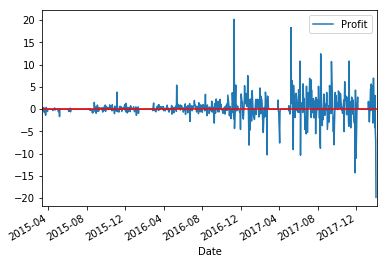

In [8]:
fb['Profit'].plot()
plt.axhline(y= 0,color = 'red')
plt.legend(loc='upper right', fontsize=10)

### Display my model's performance

In [9]:
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Share,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


### Plot the wealth to show the growth of profit over the period

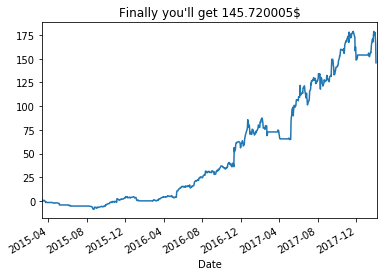

In [10]:
fb['wealth'].plot()
plt.title("Finally you'll get 145.720005$")